In [3]:
import pandas as pd
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from dataclasses import dataclass
from typing import *
from dataclasses import dataclass

In [4]:
## Data Import
impf = pd.read_excel("impfkategorien.xlsx", skiprows=2)
impf.head()

,Zielgruppe,Priorität,Beschreibung,Grösse der Zielgruppe schweizweit laut BAG-Schätzung,Anteil an Summe P1-P4,Zürich,Bern,Waadt,Aargau,St. Gallen,...,Schwyz,Zug,Schaffhausen,Jura,Appenzell A. Rh.,Nidwalden,Glarus,Obwalden,Uri,Appenzell I. Rh.
0,1a i,P1,"Bewohner/innen von Alters- und Pflegeheimen, A...",141250.0,0.0342191,25263.973976,17060.787764,13213.996797,11256.708666,8382.628500,...,2633.942956,2094.975990,1351.569881,1207.727184,910.013504,707.182827,666.199804,622.541478,602.402843,264.707328
1,1a ii,P1,"Bewohner/innen von Alters- und Pflegeheimen, A...",15610.0,0.00378167,2792.004487,1885.443519,1460.322053,1244.015733,926.391723,...,291.085660,231.522656,149.366413,133.469886,100.568572,78.153090,73.623922,68.799097,66.573511,29.253674
2,1b i,P1,"Im eigenen Haushalt lebend, Alter ab 75 Jahre",633850.0,0.153556,113370.406406,76559.152736,59296.933593,50513.733011,37616.489026,...,11819.644196,9401.065706,6065.080136,5419.595579,4083.625202,3173.436001,2989.527405,2793.613562,2703.242777,1187.856565
3,1b ii,P1,"Im eigenen Haushalt lebend, Alter 65-74 Jahre",815100.0,0.197465,145788.780092,98451.314026,76252.947183,64958.182185,48372.959225,...,15199.482503,12089.309232,7799.395471,6969.334001,5251.341646,4080.882992,3844.385561,3592.449971,3476.237577,1527.525260
4,1c,P1,Personen bis 65 Jahre mit Vorerkrankungen,621600.0,0.150588,111179.371494,75079.544594,58150.940950,49537.487481,36889.500005,...,11591.213745,9219.377523,5947.864341,5314.854637,4004.703677,3112.105101,2931.750785,2739.623239,2650.998991,1164.899647


In [10]:
def set_sizes(fig_size:Tuple[int,int]=(9, 6), font_size:int=10):
    plt.rcParams["figure.figsize"] = fig_size
    plt.rcParams["font.size"] = font_size
    plt.rcParams["xtick.labelsize"] = font_size
    plt.rcParams["ytick.labelsize"] = font_size
    plt.rcParams["axes.labelsize"] = font_size
    plt.rcParams["axes.titlesize"] = font_size
    plt.rcParams["legend.fontsize"] = font_size

In [5]:
impf_ = impf.groupby("Priorität").sum()
impf_plt = pd.DataFrame(impf_["Grösse der Zielgruppe schweizweit laut BAG-Schätzung"]).transpose()
impf_plt["AnzahlImpfungen"] = 0

In [6]:
impf_plt


Priorität,P1,P2,P3,P4,Sonstige,AnzahlImpfungen
Grösse der Zielgruppe schweizweit laut BAG-Schätzung,2353410.0,431200.0,1243200.0,100000.0,3100449.0,0


In [7]:
impf_plt = pd.DataFrame(np.array([[0,0,0,0,0,1000000]]), columns=['P1', 'P2', 'P3', 'P4', 'Sonstige', 'AnzahlImpfungen']).append(impf_plt, ignore_index=True)
impf_plt = impf_plt.rename(index={0: "Anzahl Impfungen",1: "Anzahl Personen"})

In [8]:
impf_plt

Priorität,P1,P2,P3,P4,Sonstige,AnzahlImpfungen
Anzahl Impfungen,0.0,0.0,0.0,0.0,0.0,1000000
Anzahl Personen,2353410.0,431200.0,1243200.0,100000.0,3100449.0,0


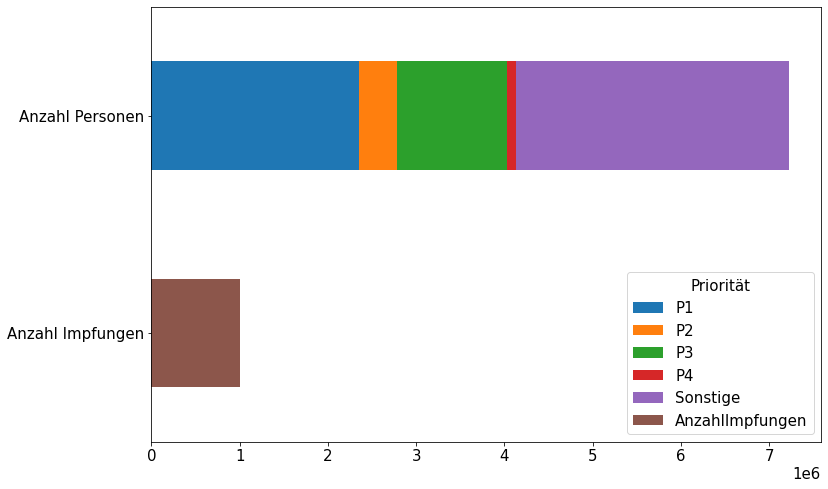

In [11]:
set_sizes((12,8), 15)
impf_plt.plot.barh(stacked=True)

plt.show()

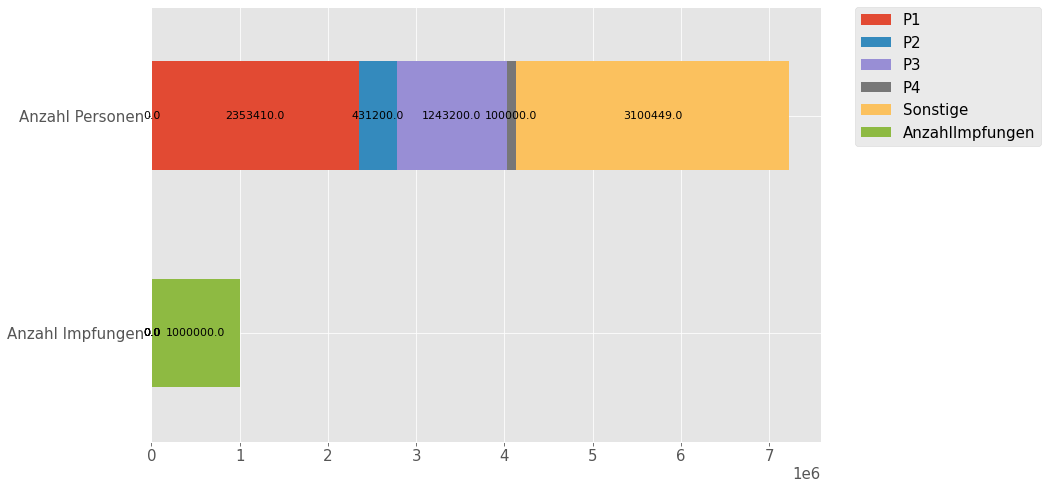

In [12]:
plt.style.use('ggplot')

ax = impf_plt.plot(stacked=True, kind='barh', figsize=(12, 8), rot='horizontal')

for rect in ax.patches:

    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{width}'  
    
    # ax.text(x, y, text)
    label_x = x + width /2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0.4:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=11)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    

plt.show()

<ipython-input-13-9beb1e3ea652>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mio)


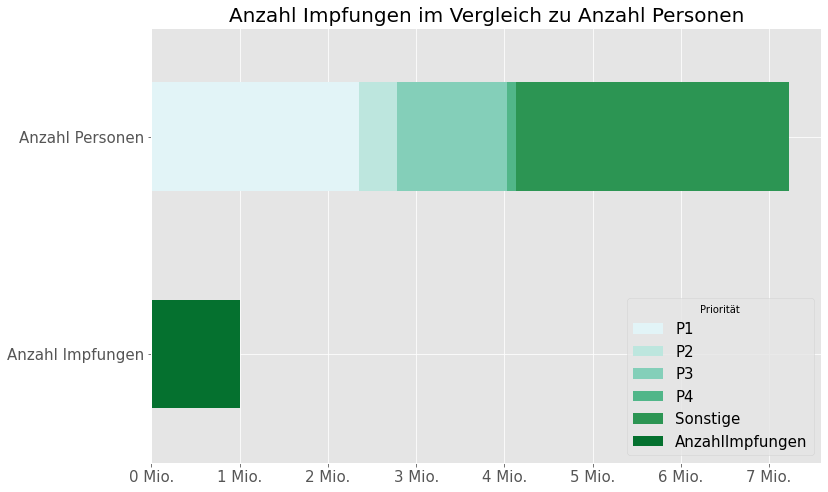

In [13]:
pal = sns.color_palette("BuGn")
ax = impf_plt.plot(kind='barh', stacked=True, color= pal)
plt.title("Anzahl Impfungen im Vergleich zu Anzahl Personen", fontsize=20)
mio = ["0 Mio.", "1 Mio.", "2 Mio.", "3 Mio.", "4 Mio.", "5 Mio.", "6 Mio.", "7 Mio."]
ax.set_xticklabels(mio)
plt.show()